# The Gender Disparity in Programming Languages on *Stack Overflow*

There is a well-known gender disparity in computer science. In the UK, [only 17% of those working in Technology are female](https://www.womenintech.co.uk/). Despite many efforts to increase female participation in STEM, the gender disparity persists. There are many possible reasons for this, including media stereotypes, a pervasive "geek" culture, and systemic sexism in the industry.

In this project, we will investigate the **gender disparities in programming languages**. In addition, we will investigate gender disparities in different developer roles. We will focus our analysis on a dataset of users from the website *Stack Overflow*. 

# Stack Overflow Developer Survey 2018

*Stack Overflow*, part of the *Stack Exchange* network, is a popular Q&A website for topics in computer programming where users can post questions and vote on the best answer. As of December 2018, [the website has over 9 million registered users](https://stackexchange.com/sites?view=list#users). Posts can be ["tagged"](https://stackoverflow.com/tags) and the most popular technologies discussed are JavaScript, Java, C#, PHP, Android, Python, jQuery, HTML, C++, and iOS. 

Every year, *Stack Overflow* runs a developer survey about everything from their favourite technologies to work preferences. We are going to use the [data from the 2018 survey](https://insights.stackoverflow.com/survey/2018). Over 100,000 developers took part in this survey. 

Unfortunately, *Stack Overflow* is acknowledged to have a hostile environment that can be off-putting for many, especially beginners. As a result, we have to bear in mind that **there is a potential bias in our sample**. If females are less likely than males to participate on *Stack Overflow* because of the hostile environment, then our sample is not representative of the wider developer community.

## Understanding the data

The survey dataset includes two CSV files:
- `survey_results_public` contains the survey results with one respondent per row
- `survey_results_schema` contains the survey schema, that is, the questions corresponding to the column name

There is also a PDF file of the actual survey.

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

style.use('ggplot')
pd.set_option('display.max_columns', 200)
warnings.filterwarnings('ignore')

In [2]:
data_folder = "data/"
data_file = data_folder + "survey_results_public.csv"
schema_file = data_folder + "survey_results_schema.csv"

In [3]:
df = pd.read_csv(data_file)
df.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

## Gender

The `Gender` column provides data on the gender identity of the respondent. 

In [4]:
df['Gender'].value_counts(dropna = False, normalize = True).head(5) * 100

Male                                                 60.146679
NaN                                                  34.784280
Female                                                4.071620
Non-binary, genderqueer, or gender non-conforming     0.287289
Female;Transgender                                    0.146679
Name: Gender, dtype: float64

We will ignore the respondents who did not provide a gender identity. This excludes a large proportion of respondents - nearly 35% in fact. In all further analysis we will only consider respondents that specified a gender identity. Furthermore, for the purposes of our investigation we will restrict our analysis to respondents who provided either a "Male" or "Female" gender identity. 

In [5]:
df = df[df['Gender'].notnull()]
other = [x for x in df['Gender'].unique() if x not in ['Male', 'Female']]
df.loc[df['Gender'].isin(other), 'Gender'] = 'Other'

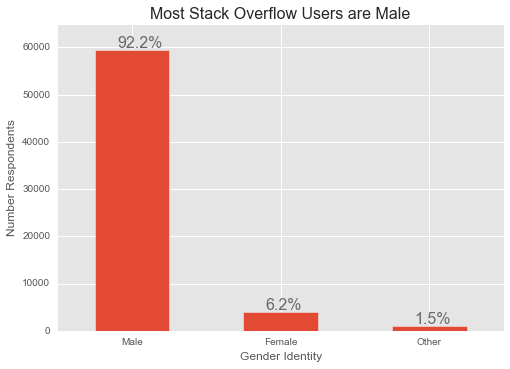

In [6]:
ax = df['Gender'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.ylim(0,65000)
plt.xlabel("Gender Identity")
plt.ylabel("Number Respondents")
plt.title("Most Stack Overflow Users are Male", fontsize = 16)

total_users = len(df)

for i in ax.patches:
    ax.text(i.get_x()+0.3*i.get_width(), i.get_height()+500, str(round((i.get_height()/total_users)*100, 1))+'%', fontsize=16, color='dimgrey')

These results show that the overwhelming majority of *Stack Overflow* users are male, indicating a gender bias on the site that is much greater than what we expected. One thing to bear in mind is that nearly 35% of respondents did not provide a gender identity. It would be interesting to know whether different genders of people were more likely to not provide a gender identity. If so, then our sample is likely to be biased.

In [7]:
df = df[(df['Gender'] == 'Male') | (df['Gender'] == 'Female')]

In [8]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

## Location

Now that we have an idea of the gender disparity on *Stack Overflow*, it would also be interesting to see which countries these users are based in. In order to have sufficient data to accurately calculate the proportion of female programmers, we will focus on the top 10 countries by number of survey respondents.

In [9]:
country_df = pd.concat([male_df['Country'].value_counts(), female_df['Country'].value_counts()], axis = 1)
country_df.columns = ['male', 'female']
country_df.fillna(0, inplace = True)
country_df['total'] = country_df['male'] + country_df['female']
country_df['male_norm'] = country_df['male']/country_df['total']*100
country_df['female_norm'] = country_df['female']/country_df['total']*100

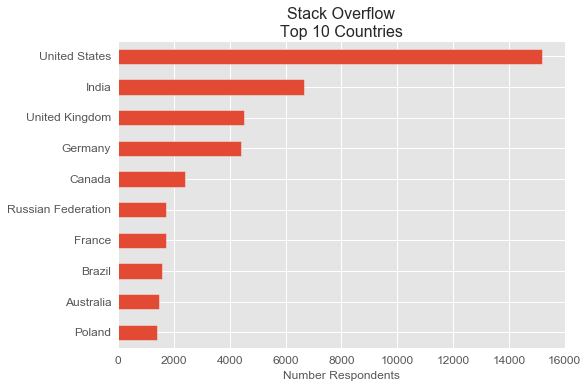

In [10]:
country_df.sort_values(by = 'total')[-10:]['total'].plot.barh()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.title("Stack Overflow\nTop 10 Countries", fontsize = 16)
plt.xlabel("Number Respondents")

Because *Stack Overflow* is an English-language site, it is unsurprising that five out of the ten most popular countries have English as at least one of their official languages. 

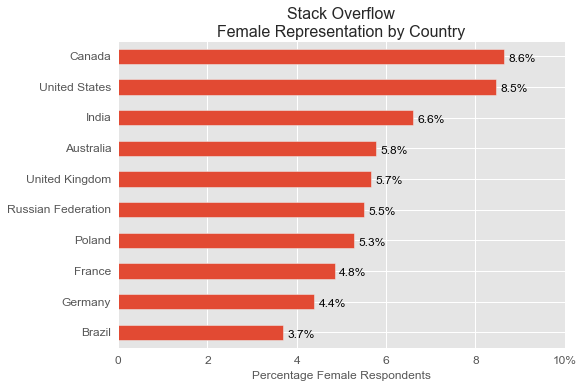

In [11]:
ax = country_df[['female_norm', 'male_norm', 'total']].sort_values(by = 'total')[-10:].sort_values(by = 'female_norm')['female_norm'].plot.barh()
plt.xlim(0,10)
plt.title("Stack Overflow\nFemale Representation by Country", fontsize = 16)
plt.xlabel("Percentage Female Respondents")
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_xticklabels(labels = ['0', '2', '4', '6', '8', '10%'])

for i in ax.patches:
    width, _ = i.get_width(), i.get_height()
    _, y = i.get_xy() 
    ax.text(width + 0.1, y + 0.1, str(round(width, 1))+'%', fontsize = 12, color = 'black')   

None of the ten most popular countries on *Stack Overflow* have over 9% female programmers. The five English-speaking countries in the list perform best in terms of female representation, with Canada and the US slightly ahead of India, Australia, and the UK.

In [12]:
def get_male_female_counts(df, column):
    # Given a list column `column`, return DataFrame of male and female counts for each value of `column`
    
    male_dict = defaultdict(int)
    female_dict = defaultdict(int)
    nan_count = 0

    for _, row in df[['Gender', column]].iterrows():
        gender = row['Gender']
        col_values = row[column]
        if type(col_values) == float and np.isnan(col_values):
            pass
            nan_count += 1
        else:
            for col_value in col_values:
                if gender == 'Male':
                    male_dict[col_value] += 1
                elif gender == 'Female':
                    female_dict[col_value] += 1
                    
    male_df = pd.DataFrame.from_dict(male_dict, orient = 'index').rename(columns = {0: 'male'})
    female_df = pd.DataFrame.from_dict(female_dict, orient = 'index').rename(columns = {0: 'female'})
    
    value_df = pd.concat([male_df['male'], female_df['female']], axis = 1)
    value_df['total'] = value_df['male'] + value_df['female']
    value_df['male_norm'] = value_df['male']/value_df['total'] * 100 
    value_df['female_norm'] = value_df['female']/value_df['total'] * 100
    print("There were %i undefined values." % nan_count)
    print("This represents %.2f%% of values." % round((nan_count/float(len(df))*100),2))
    
    return value_df

## Developer type

Next, we will investigate the different types of developer roles and see which roles have the highest female representation. Different types of developer roles are also likely to be associated with different programming languages.

We will be using the `DevType` column. Note that survey respondents were able to select multiple developer roles from a given list. A small proportion of respondents did not provide any developer role.

In [13]:
df['DevType'] = df['DevType'].str.split(pat = ";")

In [14]:
dev_types_df = get_male_female_counts(df, 'DevType')

There were 1127 undefined values.
This represents 1.78% of values.


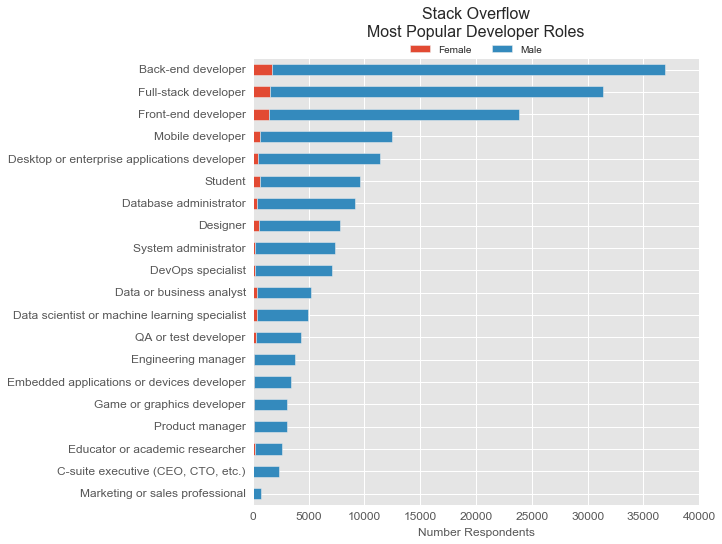

In [15]:
dev_types_df.sort_values(by = 'total')[['female','male']].plot.barh(stacked = True, figsize = (8,8))
plt.title("Stack Overflow\nMost Popular Developer Roles\n", fontsize = 16)
plt.xlabel("Number Respondents")
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(labels = ['Female', 'Male'], loc = 9, bbox_to_anchor=(0.5, +1.05), ncol = 2)

We see that the most popular developer roles on *Stack Overflow* are in web and mobile development. The red bars indicate the number of female respondents, while the blue bars indicate the number of male respondents. We can observe that all developer roles are very male dominated. 

To better see the levels of female participation in different roles, the next plot will show the proportion of female respondents for each developer role. 

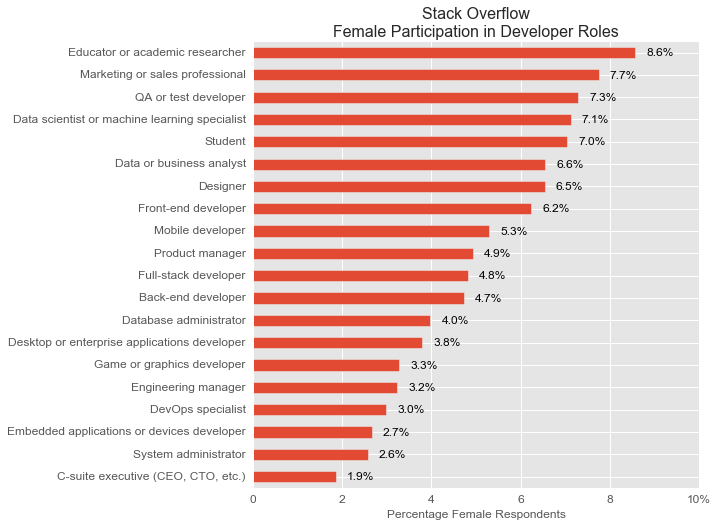

In [16]:
ax = dev_types_df[['female_norm', 'male_norm']].sort_values(by = 'female_norm')['female_norm'].plot.barh(legend = None, figsize = (8,8))
plt.xlim(0,10)
plt.title("Stack Overflow\nFemale Participation in Developer Roles", fontsize = 16)
plt.xlabel("Percentage Female Respondents")
plt.tick_params(axis='both', which='major', labelsize = 12)
ax.set_xticklabels(labels = ['0', '2', '4', '6', '8', '10%'])

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(width+0.25, y+0.1, str(round(width, 1))+'%', fontsize=12, color='black')

We see that there is a lot variation in gender disparity between different types of developer roles. 

The roles with the highest female participation (7-8.6%) are:
- Educator or academic researcher                  
- Marketing or sales professional                  
- QA or test developer                            
- Data scientist or machine learning specialist    
- Student

It will be interesting to see if the programming languages associated with these roles also have higher levels of female participation compared to other languages.

On the other hand, the roles with the lowest female participation are:
- C-suite executive
- System administrator
- Embedded applications or devices developer
- DevOps specialist
- Engineering manager

C-suite executives have the lowest female participation, and this agrees with many studies reporting that [very few leadership positions in tech are held by women](https://www.pwc.co.uk/who-we-are/women-in-technology/time-to-close-the-gender-gap.html). 

## Programming languages

We have observed that certain developer roles have greater female representation than others. Now we will look at whether this is also the case for programming languages. We will be using the `LanguageWorkedWith` column, where respondents were asked to list the programming languages they work with. 

In [17]:
df['LanguageWorkedWith'] = df['LanguageWorkedWith'].str.split(pat = ";")
languages_df = get_male_female_counts(df, 'LanguageWorkedWith')

There were 415 undefined values.
This represents 0.65% of values.


We will ignore languages that had less than 2000 respondents in total. This means excluding the languages Haskell, Pascal, and Julia, among others.

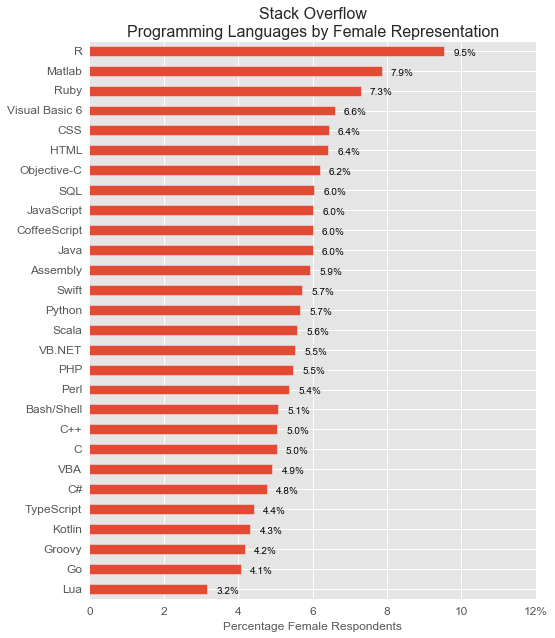

In [18]:
ax = languages_df[languages_df['total'] > 2000][['female_norm', 'male_norm']].sort_values(by = 'female_norm')['female_norm'].plot.barh(legend = None, figsize = (8,10))
plt.xlim(0,12)
plt.title("Stack Overflow\nProgramming Languages by Female Representation", fontsize = 16)
plt.xlabel("Percentage Female Respondents")
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_xticklabels(labels = ['0', '2', '4', '6', '8', '10', '12%'])

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(width+0.25, y+0.05, str(round(width, 1))+'%', fontsize=10, color='black')

The programming languages with the largest highest female representation on *Stack Overflow* are:
- R
- Matlab
- Ruby
- Visual Basic 6
- CSS

Interstingly, the languages *R* and *Matlab* are both heavily used in academia and education which was the top developer role for female representation. *R* is also heavily used in data scientist roles, which was another top role in terms of female representation. Data scientists can come from a variety of disciplines such as maths or statistics and these students are more likely to use *R* as their primary language rather than *Python*, which is more likely to be the language of those who had studied computer science. 

The observation that *R* has the highest level of female participation agrees with observations from other bloggers. [This detailed blog post by Reshama Shaikh](https://reshamas.github.io/why-women-are-flourishing-in-r-community-but-lagging-in-python/) shows that a larger proportion of *R* package authors are female than for *JavaScript*, *C#*, *Ruby*, *Python* or *Java*. Reshama also discusses the many reasons why *R* has high levels of female participation. The *R* community is known to be particularly inclusive to women, and there are many meetup groups for women programming in *R*. Furthermore, *R* is used primarily by statisticians, and there are proportionally more women studying maths or statistics than computer science. 


In terms of the languages with the lowest levels of female representation, *Lua* is used for embedded applications, *Go* is a C-like language, and *Kotlin* is used for Android development. 

## Degrees

We suspect that the popularity in *R* amongst female programmers is in part due to the fact that women are more likely to do a degree in maths or statistics than in computer science. We can determine whether this pattern indeed holds for our respondents by investigating the `UndergradMajor` column, where respondents were asked to select the field of study most relevant to their degree.

In [19]:
(df['UndergradMajor'].value_counts(normalize = True, dropna = False) * 100).head(5)

Computer science, computer engineering, or software engineering          54.126302
NaN                                                                      14.307767
Another engineering discipline (ex. civil, electrical, mechanical)        7.636690
Information systems, information technology, or system administration     6.839626
A natural science (ex. biology, chemistry, physics)                       3.731708
Name: UndergradMajor, dtype: float64

In [20]:
major_df = pd.concat([male_df['UndergradMajor'].value_counts(), female_df['UndergradMajor'].value_counts()], axis = 1)
major_df.columns = ['male', 'female']
major_df.fillna(0, inplace = True)
major_df['total'] = major_df['male'] + major_df['female']
major_df['male_norm'] = major_df['male']/major_df['total']*100
major_df['female_norm'] = major_df['female']/major_df['total']*100

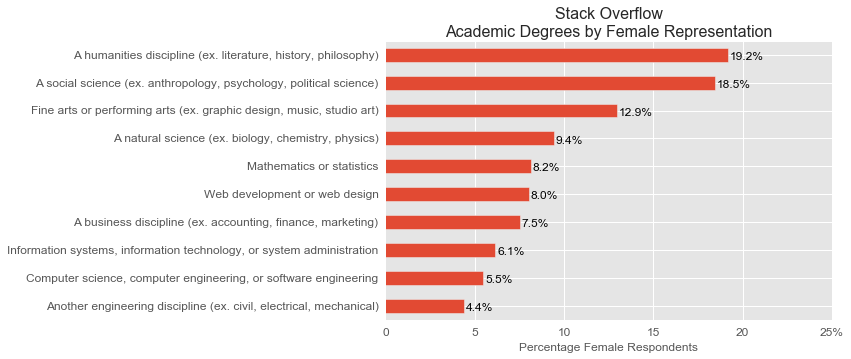

In [21]:
ax = major_df[['female_norm', 'male_norm', 'total']].sort_values(by = 'total')[-10:].sort_values(by = 'female_norm')['female_norm'].plot.barh(figsize = (8,5))
plt.xlim(0,25)
plt.title("Stack Overflow\nAcademic Degrees by Female Representation", fontsize = 16)
plt.xlabel("Percentage Female Respondents")
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_xticklabels(labels = ['0', '5', '10', '15', '20', '25%'])

for i in ax.patches:
    width, _ = i.get_width(), i.get_height()
    _, y = i.get_xy() 
    ax.text(width + 0.1, y + 0.1, str(round(width, 1))+'%', fontsize = 12, color = 'black')   

Around 14% of the respondents we considered did not provide information about their degree major. However, of those who did provide information, we observe that the natural sciences, maths, and statistics have greater female representation than computer science, and students of these fields are more likely to use *R* or *Matlab* than, for instance, *Python*.

## Frameworks

There is also another column in the data called `FrameworkWorkedWith`, where respondents were asked to list the frameworks, libraries, and tools that they work with. 

In [22]:
df['FrameworkWorkedWith'] = df['FrameworkWorkedWith'].str.split(pat = ";")
frameworks_df = get_male_female_counts(df, 'FrameworkWorkedWith')

There were 20436 undefined values.
This represents 32.19% of values.


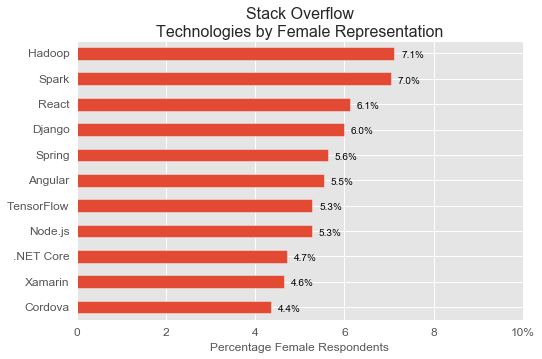

In [23]:
ax = frameworks_df[frameworks_df['total'] > 2000][['female_norm', 'male_norm']].sort_values(by = 'female_norm')['female_norm'].plot.barh(legend = None, figsize = (8,5))
plt.xlim(0,10)
plt.title("Stack Overflow\nTechnologies by Female Representation", fontsize = 16)
plt.xlabel("Percentage Female Respondents")
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_xticklabels(labels = ['0', '2', '4', '6', '8', '10%'])

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(width+0.15, y+0.1, str(round(width, 1))+'%', fontsize=10, color='black')

All of the technologies here have levels of 4.4-7.1% female representation. The top two technologies in terms of female representation are *Hadoop* and *Spark* which are used in data science. This appears to agree with our analysis of developer roles, where we found that a relatively large (7%) of data scientist or machine learning specialists were female. The next two frameworks, *React* and *Django*, are used in web development. Surprisingly, the machine learning library Tensorflow is further down the list.

In terms of the frameworks with lower female representation, *Xamarin* and *Cordova* are both used in mobile development.

It is worth noting that a large proportion of respondents did not list any frameworks, and so we can't be sure that this information is representative. 

# Conclusions

In this project, we analysed data from the *Stack Overflow* 2018 developer survey. Analysing the respondents who provided a male or female gender identity, we found that: 

- An overwhelming majority of *Stack Overflow* users are male
- Academic and sales/marketing roles have the highest levels of female participation, followed by QA developers, data scientists, and students 
- Less than 2% of women on *Stack Overflow* are C-suite executives
- Other roles with low levels of female participation include DevOps, system admin, and devices developers
- The *R* programming community has the highest level of female participation, and there are many reasons why this may be the case
- *Matlab* also has a high level of female participation
- The data science frameworks *Hadoop* and *Spark* are the frameworks with the highest levels of female participation

Such findings can help us better understand the gender disparity within computer science and how we can address this issue. 

There are some limitations to our approach. In particular, the *Stack Overflow* community is not necessarily representative of the wider developer community. Furthermore, a substantial amount of respondents did not provide a gender identity. If some communities of developers were less likely to put down a gender identity than others, this introduces a bias in our data as we are only able to analyse survey data of respondents who did provide a gender identity.

# Areas for futher investigation
This investigation has identified some interesting patterns and, as any good investigation, it has also raised further questions. The list below suggests some potential areas for further investigation.

- Are the same patterns identified in other developer communities, such as *Github* or *HackerRank*?
- Have there been changes to these patterns over the years? (The *Stack Overflow* Developer Survey has been going on since 2011). 
- Which programming languages correlate with which developer roles?
- How do these languages compare with the highest paying languages? 
- Is the distribution of programming languages different amongst different age groups?
- Do the results vary between countries?
- What subjects are female programmers studying at University?